<h1>logistic regression without applying polynomin</h1>

do regularization with modal 'liblinear'

# <h4>score: private 0.745 - public 0.753</h4>

In [16]:
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



train_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/train.csv'
test_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/test.csv'



In [18]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train_y = train['target']
train = train.drop(columns=['id', 'target'])

test = test.drop(columns=['id'])


robust_scaler = RobustScaler().fit(train.values)
trans_x = robust_scaler.transform(train.values)
trans_test = robust_scaler.transform(test.values)

best_score:  0.752


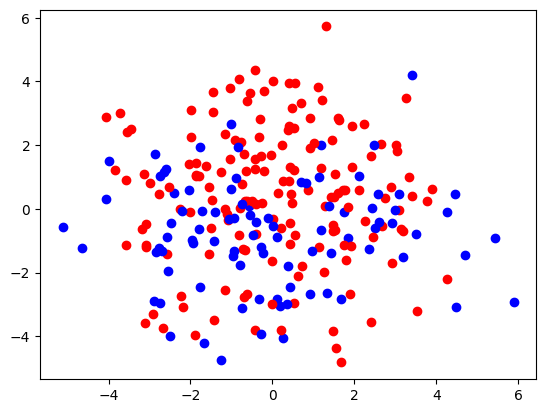

In [22]:
param_grid = {"C": [.01, .1, 1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000, penalty = 'l1')
grid_train = GridSearchCV(logisticClassifier, param_grid, cv = 5)
grid_train.fit(trans_x, train_y)

print('best_score: ', grid_train.best_score_)

pca = PCA(n_components = 200)
pca.fit(train.values)
vals_2d = pca.transform(train.values)

colors = ['red' if t == 1 else 'blue' for t in train_y]
for i in range(len(vals_2d)):
    plt.scatter(x = vals_2d[i,0], y = vals_2d[i,1], color = colors[i])

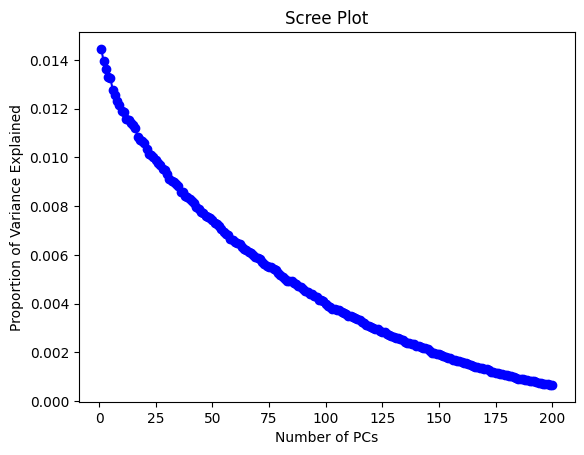

In [23]:
# Create a pipeline with PCA and logistic regression
pc_num = 200

pipe = Pipeline([
    ('pca', PCA(n_components = pc_num)), # choose number of components to keep
    ('clf', LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000, penalty = 'l1'))
])

pipe.fit(trans_x, train_y)

# Create a scree plot
plt.plot(np.arange(1, pipe['pca'].n_components_+1), pipe['pca'].explained_variance_ratio_, 'bo-')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

<h3>Real prediction on testing data</h3>

In [24]:
param_grid = {"C": [.01, .1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000, penalty = 'l1')

# find best parameter with cross validation
grid_test = GridSearchCV(logisticClassifier, param_grid, cv=5)
grid_test.fit(trans_x, train_y)


predictions = grid_test.predict_proba(trans_test)[:,1]

In [25]:
# output csv file

pred_result_list = [int(round(x)) for x in predictions]

with open('../result_folder/logistic_V12.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "target"])
    for i in range(250, 20000):
        writer.writerow([i, pred_result_list[i-250]])
    file.close()
